<a href="https://colab.research.google.com/github/bryan-wolff/MS211/blob/main/Trabalho%201/M%C3%A9todos_Num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MS211 - Cálculo Numérico**
## Trabalho 1 - Métodos Numéricos
### Bryan Wolff - RA: 214095
### Wesna Araujo - RA: 225843

# Modelando o Problema

In [ ]:
#@title Importação de Bibliotecas
import math
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
#@title Função do Problema
def f(x):
  return x**3 -3*x**2 + 2.4

In [ ]:
#@title Rotinas implementadas para graficar

#plota 1 gráfico
def plot(x, y, title, x_name, y_name):
    plt.figure() 
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(x_name, fontsize=10)
    plt.ylabel(y_name, fontsize=10)
    plt.grid(True)
    plt.show()

#plota 2 gráficos em uma figure
def plot2(x1, y1, x2, y2, x_name, y_name):
    plt.figure() 
    plt.plot(x1,y1, label='f(x)')
    plt.scatter(x2, y2, c ='red', label='Aproximação')
    plt.xlabel(x_name, fontsize=10)
    plt.ylabel(y_name, fontsize=10)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

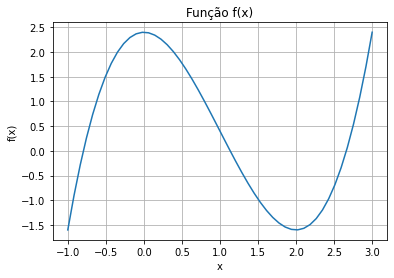

In [ ]:
#@title Gráfico da função f(x)

x_vetor = np.linspace(-1,3,50)
y_vetor = [f(i) for i in x_vetor]
plot(x_vetor,y_vetor, "Função f(x)", "x", "f(x)")

In [ ]:
x_vetor = np.linspace(2.2,3,50)
y_vetor = [f(i) for i in x_vetor]

#Método da Bissecção


In [ ]:
#Disponivel em https://www.geeksforgeeks.org/program-for-bisection-method/

def bisection(a = 2, b = 3, e = 0.001, func = f):
    x_v = []
    step = 0
    if (func(a) * func(b) >= 0):
        print("You have not assumed right a and b\n")
        return
    c = a
    while ((b-a) >= e):
        step += 1
        # Find middle point
        c = (a+b)/2
        x_v.append(c)
        # Check if middle point is root
        if (func(c) == 0.0):
            break
        # Decide the side to repeat the steps
        if (func(c)*func(a) < 0):
            b = c
        else:
            a = c
    print("Quantidade de interações: {}".format(step))
    print("Valor da raíz é: {:.5f}".format(c))
    return x_v

Quantidade de interações: 10
Valor da raíz é: 2.66113


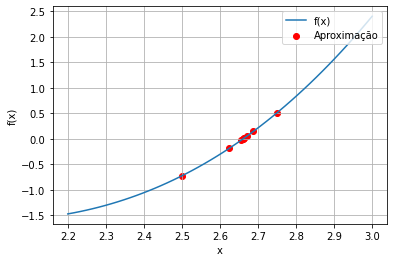

In [ ]:
x_bisection = bisection()
y_bisection = [f(i) for i in x_bisection]
plot2(x_vetor,y_vetor,x_bisection,y_bisection, "x", "f(x)")

[]


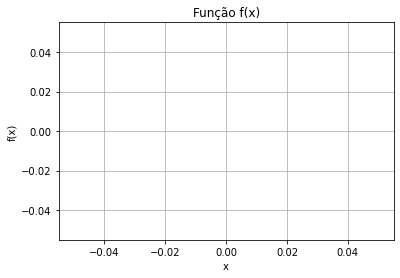

In [ ]:

plot(x_bisection, y_bisection, "Função f(x)", "x", "f(x)")

#Método da Posição Falsa

In [ ]:
#Disponível em: https://www.codesansar.com/numerical-methods/false-position-method-python-program.htm
# Implementing False Position Method
#Definir um intervalo [x0,x1] e um erro e antes de chamar o metodo
def falsePosition(x0,x1,e):
    vetor = []
    # Checking Correctness of initial guess values and false positioning
    if f(x0) * f(x1) > 0.0:
      print('Given guess values do not bracket the root.')
      print('Try Again with different guess values.')
    else:
      step = 1
      condition = True
      while condition:
          x2 = x0 - (x1-x0) * f(x0)/( f(x1) - f(x0) )
          if f(x0) * f(x2) < 0:
              x1 = x2
          else:
              x0 = x2

          step = step + 1
          condition = abs(f(x2)) > e
          vetor.append(x2)
      print("Quantidade de interações: {}".format(step))
      print("Valor da raíz é: {:.5f}".format(x2))
      return vetor

Quantidade de interações: 8
Valor da raíz é: 2.66099


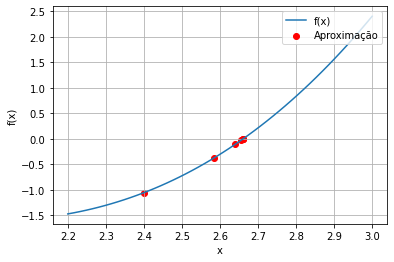

In [ ]:
x_falsePosition = falsePosition(2,3,0.001)
y_falsePosition = [f(i) for i in x_falsePosition]
plot2(x_vetor,y_vetor,x_falsePosition,y_falsePosition, "x", "f(x)")

#Método Ponto Fixo

In [ ]:
#disponivel em: https://www.codesansar.com/numerical-methods/fixed-point-iteration-python-program-output.htm
# Re-writing f(x)=0 to x = g(x)
def g(x):
  return math.sqrt((-2.4)/(x-3))

# Implementing Fixed Point Iteration Method
def fixedPointIteration(x0 = 2, e = 0.001, N = 20, func = f, funcg = g):
    vetor = []
    step = 1
    flag = 1
    condition = True
    while condition:
        x1 = funcg(x0)
        x0 = x1
        step = step + 1
        if step > N:
            flag=0
            break
        condition = abs(func(x1)) > e
        vetor.append(x1)
    if flag==1:
        print("Valor da raíz é: {:.5f}".format(x1))
    else:
        print('\nNot Convergent.')
    print("Quantidade de interações: {}".format(step))
    return vetor

Valor da raíz é: 1.13427
Quantidade de interações: 9


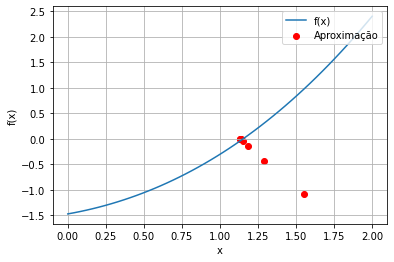

In [ ]:
x_fixedPointIteration = fixedPointIteration()
y_fixedPointIteration = [f(i) for i in x_fixedPointIteration]

x_new = np.linspace(0,2,50)
y_new = [f(i) for i in x_vetor]

plot2(x_new,y_new,x_fixedPointIteration,y_fixedPointIteration, "x", "f(x)")

#Método de Newton-Raphson

In [ ]:
#disponivel em https://www.geeksforgeeks.org/program-for-newton-raphson-method/

def newtonRaphson(x = 3, e = 0.001, func = f):
  vetor = []
  qtd_inter = 0
  h = func(x)/((3*(x**2)) - (6*x))
  while abs(h) >= e:
    h = func(x)/((3*(x**2)) - (6*x))
    x = x - h
    qtd_inter += 1
    vetor.append(x)
  print("Valor da raíz é: {:.5f}".format(x))
  print("Quantidade de interações: {}".format(qtd_inter))
  return vetor


Valor da raíz é: 2.66108
Quantidade de interações: 4


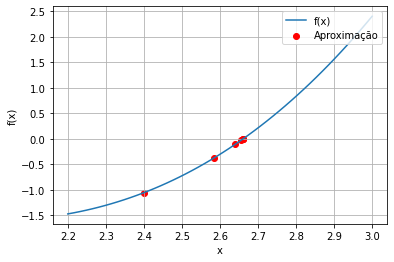

In [ ]:
x_newtonRaphson = newtonRaphson()
y_newtonRaphson = [f(i) for i in x_newtonRaphson]
plot2(x_vetor,y_vetor,x_falsePosition,y_falsePosition, "x", "f(x)")

#Verificando Raízes

In [ ]:
#@title Método da Bissecção
print("O valor de f(x) para a raíz obtida neste método é ", f(2.66113))

O valor de f(x) para a raíz obtida neste método é  0.00025384440489295557


In [ ]:
#@title Método da Posição Falsa
print("O valor de f(x) para a raíz obtida neste método é ", f(2.66099))

O valor de f(x) para a raíz obtida neste método é  -0.0004849861317013371


In [ ]:
#@title Método Ponto Fixo
print("O valor de f(x) para a raíz obtida neste método é ", f(1.13427))

O valor de f(x) para a raíz obtida neste método é  -0.0003893223145170488


In [ ]:
#@title Método de Newton-Raphson
print("O valor de f(x) para a raíz obtida neste método é ", f(2.66108))

O valor de f(x) para a raíz obtida neste método é  -1.0046068288804832e-05
